In [37]:
import numpy as np
import skimage as ski
import matplotlib.pyplot as plt

In [38]:
# Utils

# Importer une image
def import_image(filename):
    image = ski.io.imread(filename)
    return np.array(image)

# Afficher une image
def display_image(image, title):
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Calculer le PSNR entre deux images
def psnr(original_image, processed_image):
    original_image = original_image.astype(np.float64)
    processed_image = processed_image.astype(np.float64)
    mse = np.mean((original_image - processed_image) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr_value = 10 * np.log10((max_pixel ** 2) / mse)
    return psnr_value

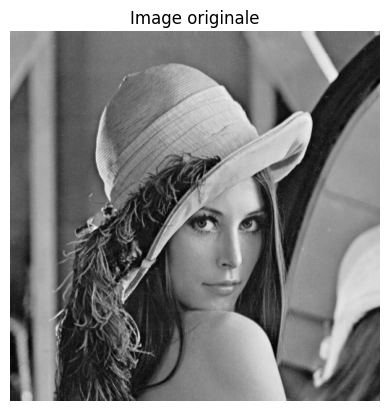

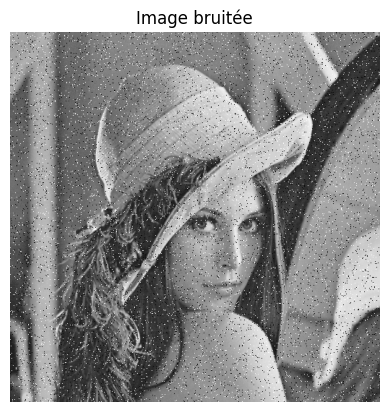

PSNR entre l'image originale et l'image bruitée :  18.402760741593337


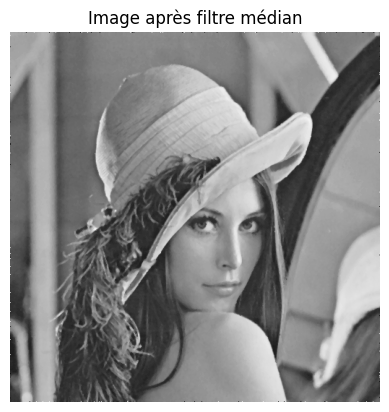

PSNR entre l'image originale et l'image débruitée :  33.0155897440669


In [55]:
# Attention ici je n'ai pas pris les bords en compte pour le filtrage
image = import_image("lena.pgm")
display_image(image, "Image originale")

# Bruit poivre et sel
image_noised = ski.util.random_noise(image, mode='s&p', amount=0.05) * 255
image_noised = image_noised.astype(np.uint8)
display_image(image_noised, 'Image bruitée')
ski.io.imsave("results/noised.pgm", image_filtree)
image_filtree = image_noised.copy()

psnr_originale_bruitee = psnr(image, image_noised)
print("PSNR entre l'image originale et l'image bruitée : ", psnr_originale_bruitee)

window_size = 3
offset = window_size // 2

for i in range(offset, image_noised.shape[0] - offset):
    for j in range(offset, image_noised.shape[1] - offset):
        # Fenêtre autour du pixel
        window = image_noised[i - offset:i + offset + 1, j - offset:j + offset + 1]
        
        median_value = np.median(window)
        
        image_filtree[i, j] = median_value

display_image(image_filtree, "Image après filtre médian")
ski.io.imsave("results/denoised.pgm", image_filtree)
psnr_originale_debruitee = psnr(image, image_filtree)
print("PSNR entre l'image originale et l'image débruitée : ", psnr_originale_debruitee)

plt.show()